In [1]:
import pandas as pd

일부 데이터는 다운로드한 뒤 편의를 위래 이름을 변경하였음  
예)  서울시 등록인구(연령별/동별) 통계 => 등록인구 (연령별_동별)

## 인구밀도 데이터 생성

In [2]:
# 행정구역(구별).csv는 자치구별 면적이 포함되어 있음
df_area = pd.read_csv("data/행정구역(구별).csv")
df_pop = pd.read_csv("data/등록인구(연령별_동별).csv")

### 면적 데이터 준비

In [3]:
# 데이터 확인
df_area.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.20,100.00,426,467,12926,96663
3,서울시,종로구,23.91,3.95,17,87,279,1475
4,서울시,중구,9.96,1.65,15,74,256,1568


In [4]:
# 불필요한 데이터 제거

# 1. 첫 번째 데이터 행(2번째 row, index=1)로 컬럼명 설정
df_area.columns = df_area.iloc[1]

# 2. 실제 데이터는 그 이후부터 시작하므로, 해당 행 이후로 슬라이싱
df_area = df_area.iloc[2:].reset_index(drop=True)

# 3. 필요한 컬럼만 선택: '자치구별(2)', '면적 (km²)' (또는 '2023')
df = df_area[['자치구별(2)', '면적 (km²)']].copy()

# 4. 컬럼명 정리
df.columns = ['자치구', '면적_km2']

# 결과 확인
df_area1 = df.copy()
df_area1.head()


,자치구,면적_km2
0,소계,605.20
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.82


In [5]:
df_area2 = df_area1[df_area1['자치구'] != '소계'].copy()
df_area2.head()


,자치구,면적_km2
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.82
5,광진구,17.06


#### 

### 등록 인구 데이터 준비

In [6]:
# 데이터 확인
df_pop.head()

,동별(1),항목,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2023.12,2023.13,2023.14,2023.15,2023.16,2023.17,2023.18,2023.19,2023.20,2023.21
0,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,계,10010983,308979,368373,374510,459621,687693,846081,755347,...,722599,719553,615216,419397,322211,229238,110645,36922,8583,1484
2,합계,한국인,9729107,300799,361894,370557,449014,641964,814659,725858,...,701870,706835,609103,417048,321421,228831,110383,36809,8537,1448
3,합계,등록외국인,281876,8180,6479,3953,10607,45729,31422,29489,...,20729,12718,6113,2349,790,407,262,113,46,36
4,종로구,계,161869,3689,4825,5256,7507,14593,13958,11008,...,11891,11602,9511,6277,5309,4342,2324,764,202,35


In [7]:
# 불필요한 데이터 필터링
df = df_pop[['동별(1)', '항목', '2023']].copy()
df_pop1 = df.copy()
df_pop1.head()

,동별(1),항목,2023
0,동별(1),항목,합계
1,합계,계,9638799
2,합계,한국인,9386034
3,합계,등록외국인,252765
4,종로구,계,150453


In [8]:
# 1. 인덱스 0~3 제거
df = df_pop1.copy()
df = df.iloc[4:].reset_index(drop=True)

# 2. '항목' 컬럼이 '계'인 행만 필터링
df_pop2 = df[df['항목'] == '계'].copy()
df_pop2.head()

,동별(1),항목,2023
0,종로구,계,150453
3,중구,계,131793
6,용산구,계,227106
9,성동구,계,284766
12,광진구,계,351180


In [9]:
df_pop3 = df_pop2.drop(columns=['항목'])
df_pop3.head()

,동별(1),2023
0,종로구,150453
3,중구,131793
6,용산구,227106
9,성동구,284766
12,광진구,351180


In [10]:
# 1. 컬럼명 통일
df_pop3 = df_pop3.rename(columns={'동별(1)': '자치구'})
df_pop3 = df_pop3.rename(columns={'2023': '인구 수'})

# 2. merge 수행 (자치구 기준으로)
df_merge = pd.merge(df_area2, df_pop3, on='자치구')
df_merge.head()

,자치구,면적_km2,인구 수
0,종로구,23.91,150453
1,중구,9.96,131793
2,용산구,21.87,227106
3,성동구,16.82,284766
4,광진구,17.06,351180


In [11]:
# 인구밀도 계산
# 숫자형 데이터로 변환
df_merge['면적_km2'] = df_merge['면적_km2'].astype(float)
df_merge['인구 수'] = df_merge['인구 수'].astype(int)

# 인구밀도 계산
df_pop_density = df_merge.copy()
df_pop_density['인구밀도'] = df_pop_density['인구 수'] / df_pop_density['면적_km2']

# 자치구와 인구밀도 컬럼만 남기기
df_pop_density = df_pop_density[['자치구', '인구밀도']]


In [12]:
df_pop_density.head()

,자치구,인구밀도
0,종로구,6292.471769
1,중구,13232.228916
2,용산구,10384.362140
3,성동구,16930.202140
4,광진구,20584.994138


In [13]:
# 시각화 준비
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


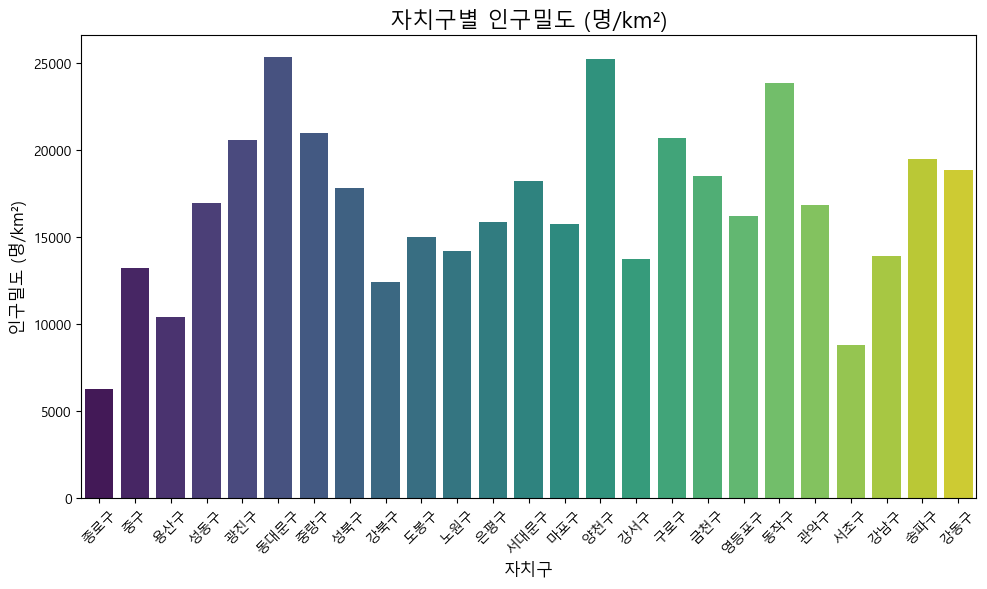

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='인구밀도', data=df_pop_density, palette='viridis')

# 제목과 축 라벨
plt.title('자치구별 인구밀도 (명/km²)', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('인구밀도 (명/km²)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 인구밀도 데이터프레임을 csv 파일로 저장

In [15]:
df_pop_density.to_csv("./data/자치구별_인구밀도.csv", index=False, encoding='utf-8-sig')


## 

## 교통 편의성 데이터 생성

In [16]:
# 버스 정류소 데이터는 여러 개의 엑셀 시트로 구성되어 있어 필요한 시트만 불러옴
df_subway = pd.read_csv("data/지하철/서울교통공사_자치구별지하철역정보_2023.CSV", encoding="cp949")
df_busstop = pd.read_excel("data/정류소.xlsx", sheet_name="2023년 12월 4일 기준")


### 지하철 데이터 준비

In [17]:
# 데이터 확인
df_subway

,자치구,해당역(호선),역개수
0,강남구,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(...",21
1,강동구,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일...",14
2,강북구,"수유(4), 미아(4), 미아사거리(4)",3
3,강서구,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우...",9
4,관악구,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)",4
5,광진구,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ...",11
6,구로구,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(...",7
7,금천구,가산디지털단지(7),1
8,노원구,"당고개(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ...",13
9,도봉구,"창동(4), 쌍문(4), 도봉산(7)",3


In [18]:
# 불필요한 자치구(고양, 광명, 성남, 의정부, 하남) 제거: 서울이 아니기 때문
df = df_subway.copy()
df = df.drop(index=range(25, 30)).reset_index(drop=True)

# 불필요한 컬럼 제거
df = df.drop(columns=["해당역(호선)"]).copy()

# 결과 확인
df_subway1 = df.copy()
df_subway1

,자치구,역개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,도봉구,3


### 버스 정류장 데이터 준비

In [19]:
# 데이터 확인
df_busstop.head()

,기준일,행정구명,ARS-ID,정류소명,노선수
0,20231204,종로구,1001,종로2가사거리,10
1,20231204,종로구,1002,창경궁.서울대학교병원,21
2,20231204,종로구,1003,명륜3가.성대입구,21
3,20231204,종로구,1004,종로2가.삼일교,7
4,20231204,종로구,1005,혜화동로터리.여운형활동터,17


In [20]:
# 불필요한 컬럼 제거
df_busstop1 = df_busstop[["행정구명", "ARS-ID", "노선수"]]
df_busstop1.head()

,행정구명,ARS-ID,노선수
0,종로구,1001,10
1,종로구,1002,21
2,종로구,1003,21
3,종로구,1004,7
4,종로구,1005,17


In [21]:
df_busstop2 = df_busstop1.copy()

# 행정구명별 정류장 수: ARS-ID의 개수
df_busstop2["총 정류소 수"] = df_busstop2["행정구명"].map(
    df_busstop2.groupby("행정구명")["ARS-ID"].count()
)

# 행정구명별 총 노선수: 노선수 값의 합
df_busstop2["총 노선수"] = df_busstop2["행정구명"].map(
    df_busstop2.groupby("행정구명")["노선수"].sum()
)

df_busstop2.head()


,행정구명,ARS-ID,노선수,총 정류소 수,총 노선수
0,종로구,1001,10,388,1471
1,종로구,1002,21,388,1471
2,종로구,1003,21,388,1471
3,종로구,1004,7,388,1471
4,종로구,1005,17,388,1471


In [22]:
# 행정구별 하나의 행만 남기도록 필터링
df = df_busstop2.copy()
df = df.drop_duplicates(subset=["행정구명"])

#인덱스 재정의
df = df.reset_index(drop=True)

# 지하철 데이터와 변수명 맞춰주기
df = df.rename(columns={'행정구명': '자치구'})

# 결과 확인
df_busstop3 = df.copy()
df_busstop3

,자치구,ARS-ID,노선수,총 정류소 수,총 노선수
0,종로구,1001,10,388,1471
1,중구,2001,35,224,1331
2,용산구,3001,17,348,1113
3,성동구,4001,6,454,993
4,광진구,5001,10,292,1089
5,동대문구,6001,6,319,1508
6,중랑구,7001,27,385,1758
7,성북구,8001,17,598,1672
8,강북구,9001,16,412,1205
9,도봉구,10001,14,367,1109


In [23]:
# merge 수행 (자치구 기준으로)
df_merge = pd.merge(df_subway1, df_busstop3, on='자치구')
df_merge.head()

,자치구,역개수,ARS-ID,노선수,총 정류소 수,총 노선수
0,강남구,21,23101,7,547,2738
1,강동구,14,25001,9,407,1379
2,강북구,3,9001,16,412,1205
3,강서구,9,16001,26,610,2253
4,관악구,4,21001,17,488,1636


In [24]:
# 자치구별 정류소 기준 평균 노선수: 보조지표로 활용하기 위해 추가
df_merge["평균_노선수"] = df_merge["총 노선수"] / df_merge["총 정류소 수"]
df_merge.head()

,자치구,역개수,ARS-ID,노선수,총 정류소 수,총 노선수,평균_노선수
0,강남구,21,23101,7,547,2738,5.005484
1,강동구,14,25001,9,407,1379,3.388206
2,강북구,3,9001,16,412,1205,2.924757
3,강서구,9,16001,26,610,2253,3.693443
4,관악구,4,21001,17,488,1636,3.352459


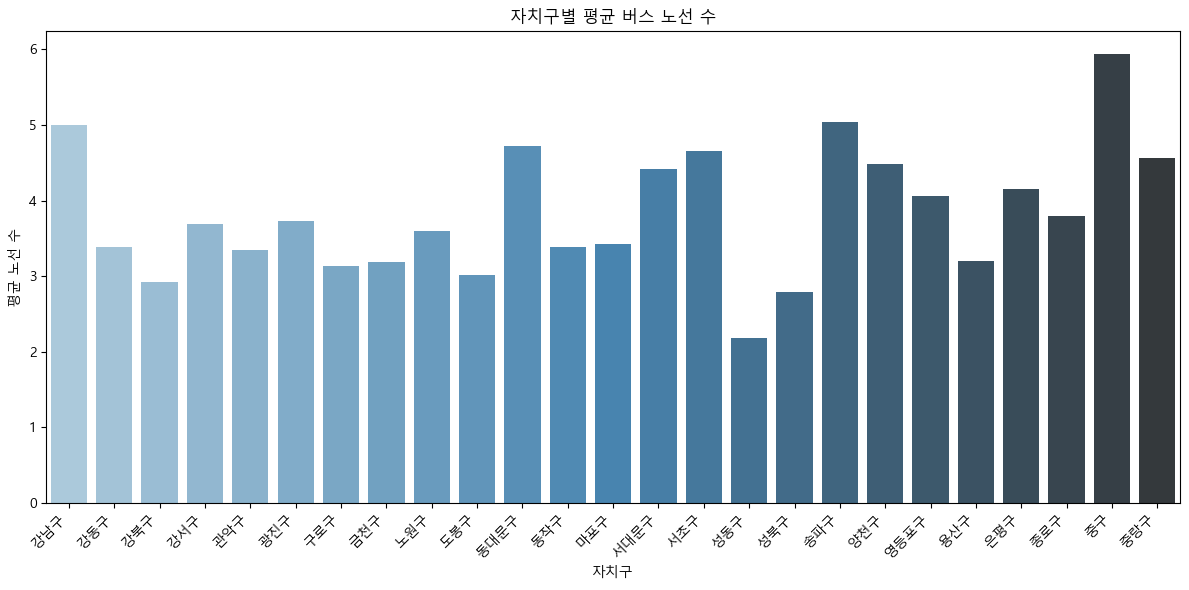

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 자치구별 평균 노선수 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merge, x="자치구", y="평균_노선수", palette="Blues_d")

plt.title("자치구별 평균 버스 노선 수")
plt.xlabel("자치구")
plt.ylabel("평균 노선 수")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


교통 편의성 계산식: 각 변수 정규화(역개수, 총 정류소 수, 총 노선수) -> 가중 평균 방식 
이유:  
1. 역 개수: 광역/지하철 등 대규모 유입 가능성  
2. 정류소 수: 소규모 지역 이동 가능성  
3. 노선 수: 해당 구역에 머물 수 있는 노선 밀집도

In [26]:
# 교통 편의성 계산
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_merge[["역개수", "총 정류소 수", "총 노선수"]])
df_merge[["역개수_scaled", "정류소_scaled", "노선수_scaled"]] = scaled

# 가중 평균 (역개수 0.5, 정류소수 0.25, 노선수 0.25)
df_merge["교통 편의성"] = (
    0.5 * df_merge["역개수_scaled"] +
    0.25 * df_merge["정류소_scaled"] +
    0.25 * df_merge["노선수_scaled"]
)


In [27]:
df_merge.head()

,자치구,역개수,ARS-ID,노선수,총 정류소 수,총 노선수,평균_노선수,역개수_scaled,정류소_scaled,노선수_scaled,교통 편의성
0,강남구,21,23101,7,547,2738,5.005484,0.740741,0.758216,0.857073,0.774193
1,강동구,14,25001,9,407,1379,3.388206,0.481481,0.429577,0.189587,0.395532
2,강북구,3,9001,16,412,1205,2.924757,0.074074,0.441315,0.104126,0.173397
3,강서구,9,16001,26,610,2253,3.693443,0.296296,0.906103,0.618861,0.529389
4,관악구,4,21001,17,488,1636,3.352459,0.111111,0.619718,0.315815,0.289439


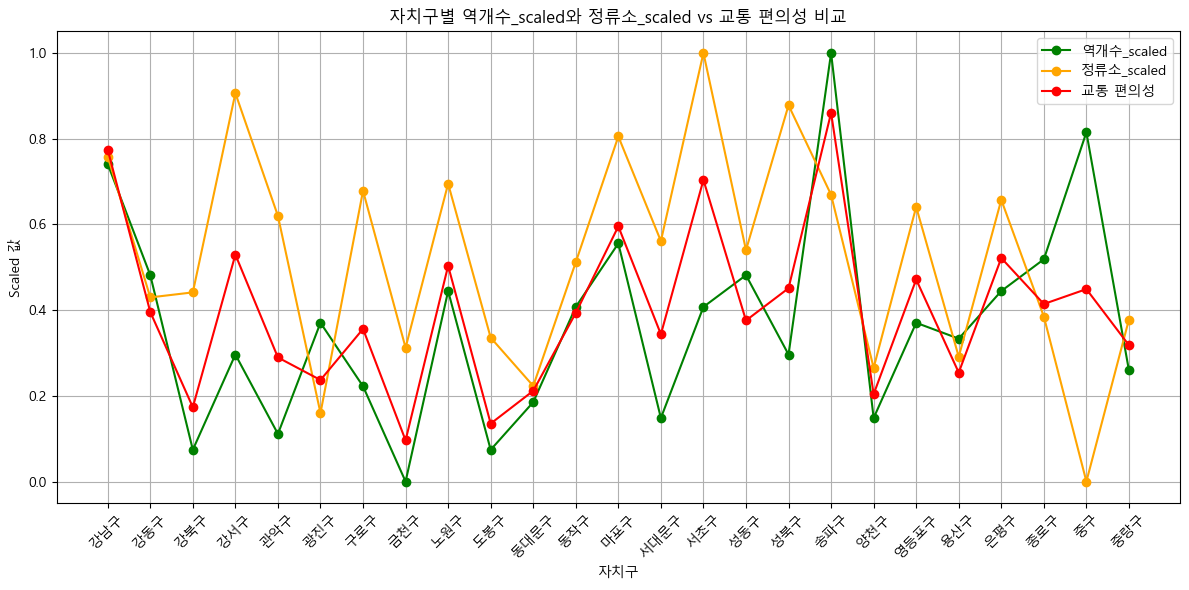

In [28]:
import matplotlib.pyplot as plt

# x축은 자치구명
x = df_merge['자치구']

plt.figure(figsize=(12,6))

# 역개수_scaled
plt.plot(x, df_merge['역개수_scaled'], marker='o', label='역개수_scaled', color = 'green')

# 정류소_scaled
plt.plot(x, df_merge['정류소_scaled'], marker='o', label='정류소_scaled', color = 'orange')

# 노선수_scaled
plt.plot(x, df_merge['교통 편의성'], marker='o', label='교통 편의성', color = 'red')

plt.title('자치구별 역개수_scaled와 정류소_scaled vs 교통 편의성 비교')
plt.xlabel('자치구')
plt.ylabel('Scaled 값')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
df_transportation_convenience = df_merge[["자치구", "교통 편의성"]]

In [31]:
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. 서울시 구 단위 GeoJSON 파일 불러오기
geo_data = gpd.read_file('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')

# 2. geo_data 컬럼 이름 맞추기 ('name' → '자치구')
geo_data = geo_data.rename(columns={'name': '자치구'})

# 3. df_transportation_convenience 데이터프레임과 병합
merged = geo_data.merge(df_transportation_convenience, on='자치구', how='left')

# 4. Folium 지도 만들기 (서울 중앙 좌표)
m = folium.Map(
    location=[37.5665, 126.9780],
    zoom_start=11,
    scrollWheelZoom=False,
    dragging=False,
    zoomControl=False
)

# 5. 서울시 경계만 따로 GeoDataFrame으로 분리 (서울 외 지역 투명도 조절용)
# (여기선 서울시 구만 있으니 모두 서울이라 가정. 실제 다른 행정구역도 있으면 조건 넣으면 됨)

# 6. Choropleth 레이어 추가 (교통 편의성 컬럼으로 시각화)
choropleth = folium.Choropleth(
    geo_data=merged.to_json(),
    data=merged,
    columns=['자치구', '교통 편의성'],
    key_on='feature.properties.자치구',
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.5,
    legend_name='교통 편의성',
    highlight=True,
    nan_fill_color='white'
).add_to(m)

# 7. 각 구별 자치구명 레이블 추가
for _, row in merged.iterrows():
    # 각 폴리곤의 중심 좌표 계산
    if row['geometry'].geom_type == 'Polygon':
        centroid = row['geometry'].centroid
    elif row['geometry'].geom_type == 'MultiPolygon':
        # MultiPolygon이면 첫번째 폴리곤의 중심 사용
        centroid = row['geometry'].geoms[0].centroid
    else:
        continue
    
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(
            html=f'<div style="font-size:10pt; font-weight:bold; color:#333">{row["자치구"]}</div>'
        )
    ).add_to(m)

# 8. 서울 외 지역 투명도 조절: 
# (서울시 구 데이터만 있으니 따로 적용 안했지만, 필요하면 조건문으로 처리 가능)

# 지도 출력
m


### 교통 편의성 데이터를 csv파일로 저장

In [35]:
df_transportation_convenience.head()

,자치구,교통 편의성
0,강남구,0.774193
1,강동구,0.395532
2,강북구,0.173397
3,강서구,0.529389
4,관악구,0.289439


In [36]:
df_transportation_convenience.to_csv("./data/자치구별_교통편의성.csv", index=False, encoding='utf-8-sig')


## 

## 문화 인프라 지수 데이터 생성  
문화 인프라 지수 = 자치구별 문화시설 면적/인구 수  
관악구가 누락되어 있어 사용 못함 => "지표 생성(예술).ipynb"파일로 예술 인프라 지료를 새로 생성하여 사용

### 문화시설 데이터 준비

In [38]:
df_culture = pd.read_csv("data/문화시설.csv", encoding = "cp949")
df_culture.head()

,소재지(시군구)별(1),소재지(시군구)별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2023.16,2023.17,2023.18,2023.19,2023.20,2023.21,2023.22,2023.23,2023.24,2023.25
0,소재지(시군구)별(1),소재지(시군구)별(2),계,계,공연장,공연장,박물관,박물관,미술관,미술관,...,문화예술진흥시설,문화예술진흥시설,전시시설,전시시설,국제회의시설,국제회의시설,공공도서관,공공도서관,전문도서관,전문도서관
1,소재지(시군구)별(1),소재지(시군구)별(2),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),...,시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡)
2,서울특별시,소계,115,757644,-,-,-,-,2,70633,...,77,701389,-,-,-,-,44,125947,-,-
3,서울특별시,종로구,19,48295,0,0,0,0,0,0,...,17,45633,0,0,0,0,2,2662,0,0
4,서울특별시,중구,3,139664,0,0,0,0,2,70633,...,1,69031,0,0,0,0,0,0,0,0


In [39]:
# 불필요한 데이터 필터링
df = df_culture[['소재지(시군구)별(2)', '2023.1']].copy()

# 결측치를 0으로 대체
df = df.replace('-', 0).copy()

# 결과 확인
df_culture1 = df.copy()
df_culture1


,소재지(시군구)별(2),2023.1
0,소재지(시군구)별(2),계
1,소재지(시군구)별(2),면적 (㎡)
2,소계,998429
3,종로구,48295
4,중구,139664
5,용산구,13933
6,성동구,1492
7,광진구,5400
8,동대문구,18091
9,중랑구,31066


In [40]:
# 0, 1, 2번째 행 제거
df = df_culture1.copy()
df = df.drop(index=[0, 1, 2]).reset_index(drop=True)

# 컬럼명 변경
df = df.rename(columns={
    '소재지(시군구)별(2)': '자치구',
    '2023.1': '문화시설 총 면적'  # 또는 필요한 이름으로
})
df_culture2 = df.copy()
df_culture2.head()


,자치구,문화시설 총 면적
0,종로구,48295
1,중구,139664
2,용산구,13933
3,성동구,1492
4,광진구,5400


### 인구 데이터 준비

In [41]:
df_pop3.head()

,자치구,인구 수
0,종로구,150453
3,중구,131793
6,용산구,227106
9,성동구,284766
12,광진구,351180


In [42]:
# 데이터프라임 병합
df_merge = pd.merge(df_culture2, df_pop3, on='자치구')
df_merge.head()

,자치구,문화시설 총 면적,인구 수
0,종로구,48295,150453
1,중구,139664,131793
2,용산구,13933,227106
3,성동구,1492,284766
4,광진구,5400,351180


In [43]:
# 문화 인프라 지수 계산 및 새로운 DataFrame 생성
df = df_merge[['자치구', '문화시설 총 면적', '인구 수']].copy()

# 문자형 데이터를 숫자형으로 변환
df['문화시설 총 면적'] = pd.to_numeric(df['문화시설 총 면적'], errors='coerce')
df['인구 수'] = pd.to_numeric(df['인구 수'], errors='coerce')

# 문화 인프라 지수 컬럼 생성
df['문화 인프라 지수'] = df['문화시설 총 면적'] / df['인구 수']

# 자치구와 문화 인프라 지수 컬럼만 남기기
df = df[['자치구', '문화 인프라 지수']]

df_cultural_infra = df.copy()
df_cultural_infra.head()

,자치구,문화 인프라 지수
0,종로구,0.320997
1,중구,1.059722
2,용산구,0.061350
3,성동구,0.005239
4,광진구,0.015377


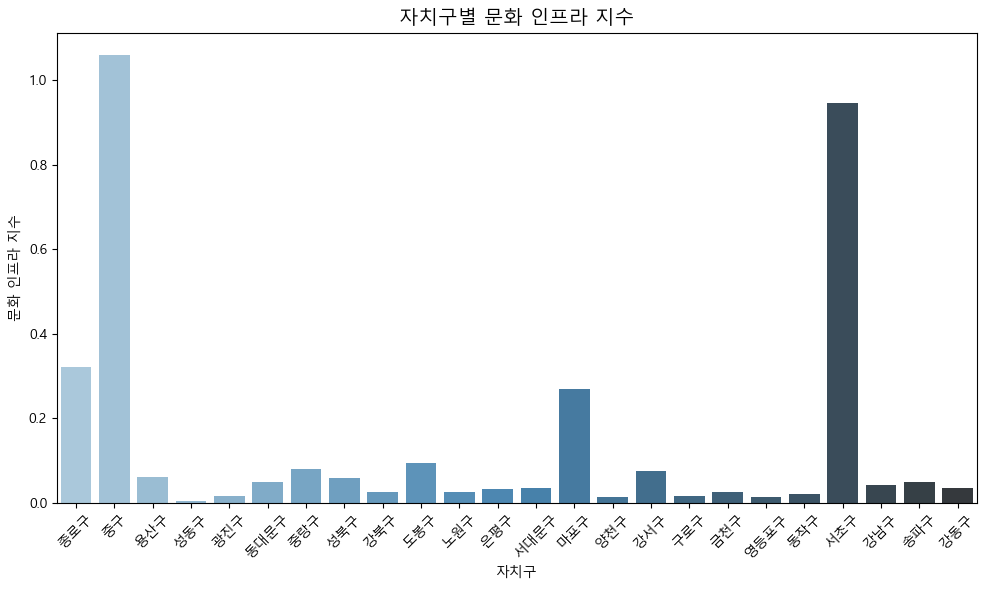

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 막대 그래프
sns.barplot(data=df_cultural_infra, x='자치구', y='문화 인프라 지수', palette='Blues_d')

# 그래프 제목 및 라벨
plt.title('자치구별 문화 인프라 지수', fontsize=14)
plt.ylabel('문화 인프라 지수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 문화 인프라 데이터를 csv파일로 저장

In [45]:
df_cultural_infra.to_csv("./data/자치구별_문화인프라지수.csv", index=False, encoding='utf-8-sig')


## 

## 의료 인프라 지수 데이터 생성

In [46]:
df_care_facility = pd.read_csv("data/의료기관/시군구별 요양기관 현황(2019.1분기~2023.4분기).csv", encoding = "cp949")
df_medical_facility = pd.read_csv("data/의료기관/시도별 의료기관수 2019~2023(보건소 제외).csv")

### 요양기관 데이터 준비

In [47]:
df_care_facility.head()

,시군구별(1),시군구별(2),2019.1.4,2019.1.4.1,2019.1.4.2,2019.1.4.3,2019.1.4.4,2019.1.4.5,2019.1.4.6,2019.1.4.7,...,2023.4.4.6,2023.4.4.7,2023.4.4.8,2023.4.4.9,2023.4.4.10,2023.4.4.11,2023.4.4.12,2023.4.4.13,2023.4.4.14,2023.4.4.15
0,시군구별(1),시군구별(2),계,국립,공립,학교법인,특수법인,종교법인,사회복지법인,사단법인,...,사회복지법인,사단법인,재단법인,회사법인,의료법인,소비자생활협동조합,사회적협동조합,개인,군병원,기타
1,서울,소계,22461,20,61,29,6,2,16,29,...,14,24,41,43,116,14,10,23977,4,0
2,서울,강남구,3026,0,4,2,1,0,2,2,...,1,2,8,6,9,2,0,3355,0,0
3,서울,강동구,1004,0,3,3,0,0,1,0,...,1,0,0,3,5,1,0,1133,0,0
4,서울,강서구,1047,0,1,2,0,0,1,3,...,1,3,0,2,9,0,0,1196,0,0


In [48]:
# 불필요한 데이터 필터링
df_care_facility1 = df_care_facility[["시군구별(2)", "2023.4.4"]].copy()
df_care_facility1.head()

,시군구별(2),2023.4.4
0,시군구별(2),계
1,소계,24364
2,강남구,3389
3,강동구,1149
4,강서구,1213


In [49]:
# 컬럼명 변경
df = df_care_facility1.rename(columns={
    '시군구별(2)': '자치구',
    '2023.4.4': '요양기관 수'  # 또는 필요한 이름으로
}).copy()

# 첫번째, 두번째 행 제거
df = df.drop([0, 1]).reset_index(drop=True)

df_care_facility2 = df.copy()
df_care_facility2.head()

,자치구,요양기관 수
0,강남구,3389
1,강동구,1149
2,강서구,1213
3,관악구,945
4,구로구,792


#### 

### 의료기관 데이터 준비(데이터 내 보건소는 포함되어 있지 않음)

In [50]:
df_medical_facility.head()

,자치구별(1),자치구별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2023.20,2023.21,2023.22,2023.23,2023.24,2023.25,2023.26,2023.27,2023.28,2023.29
0,자치구별(1),자치구별(2),계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,자치구별(1),자치구별(2),소계,소계,종합병원,종합병원,병원,병원,의원,의원,...,치과병원,치과병원,치과의원,치과의원,한방병원,한방병원,한방의원,한방의원,조산원,조산원
2,자치구별(1),자치구별(2),병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,...,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수
3,서울시,소계,17610,88029,57,33427,226,18452,8591,9826,...,60,73,4863,56,85,5250,3624,1467,3,7
4,서울시,종로구,494,3334,4,2945,2,233,189,113,...,1,40,147,-,2,193,113,20,-,-


In [51]:
# 불필요한 컬럼 필터링
df = df_medical_facility.copy()
df = df[["자치구별(2)", "2023"]]

df_medical_facility1 = df.copy()
df_medical_facility1.head()

,자치구별(2),2023
0,자치구별(2),계
1,자치구별(2),소계
2,자치구별(2),병원수
3,소계,18777
4,종로구,482


In [52]:
# 컬럼명 변경
df = df_medical_facility1.rename(columns={
    '자치구별(2)': '자치구',
    '2023': '병원 수'
}).copy()

# 첫번째, 두번째 행 제거
df = df.drop([0, 1, 2, 3]).reset_index(drop=True)

df_medical_facility2 = df.copy()
df_medical_facility2.head()

,자치구,병원 수
0,종로구,482
1,중구,595
2,용산구,327
3,성동구,478
4,광진구,579


#### 

### 인구 데이터 준비

In [53]:
# 인덱스 재설정
df_pop3 = df_pop3.reset_index(drop=True)
df_pop3.head()

,자치구,인구 수
0,종로구,150453
1,중구,131793
2,용산구,227106
3,성동구,284766
4,광진구,351180


In [54]:
# 의료기관 데이터와 요양기관 데이터 병합
df_temp = pd.merge(df_medical_facility2, df_care_facility2, on='자치구')

# 인구 데이터와 병합
df_merge = pd.merge(df_temp, df_pop3, on='자치구')
df_merge.head()

,자치구,병원 수,요양기관 수,인구 수
0,종로구,482,677,150453
1,중구,595,773,131793
2,용산구,327,452,227106
3,성동구,478,627,284766
4,광진구,579,767,351180


의료 인프라 지수 = (병원 수 + 요양기관 수) / 인구 수  
→ 의료 접근성은 인구 대비 의료기관 수로 평가할 수 있으므로, 상권 내 인구 대비 이용 가능한 의료 서비스의 밀도를 나타내는 지표로 적합

In [55]:
# 문화 인프라 지수 계산 및 새로운 DataFrame 생성
df = df_merge.copy()

# 문자형 데이터를 숫자형으로 변환
df['요양기관 수'] = pd.to_numeric(df['요양기관 수'], errors='coerce')
df['병원 수'] = pd.to_numeric(df['병원 수'], errors='coerce')
df['인구 수'] = pd.to_numeric(df['인구 수'], errors='coerce')

# 문화 인프라 지수 컬럼 생성
df['의료 인프라 지수'] = (df['요양기관 수'] + df['병원 수'])/ df['인구 수']

# 자치구와 문화 인프라 지수 컬럼만 남기기
df = df[['자치구', '의료 인프라 지수']]

df_medical_infra = df.copy()
df_medical_infra.head()

,자치구,의료 인프라 지수
0,종로구,0.007703
1,중구,0.010380
2,용산구,0.003430
3,성동구,0.003880
4,광진구,0.003833


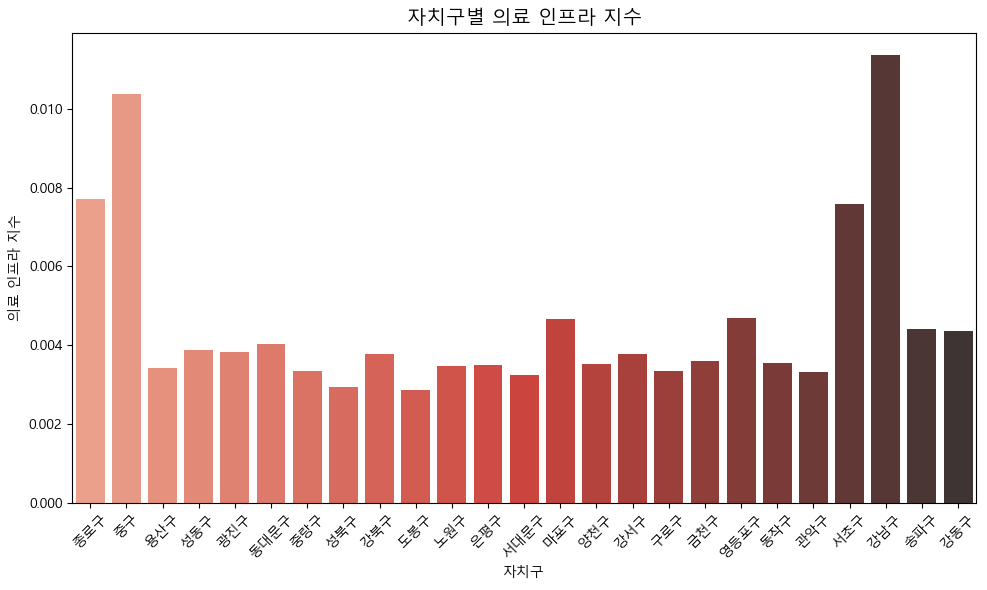

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))

# 막대 그래프
sns.barplot(data = df_medical_infra, x='자치구', y='의료 인프라 지수', palette = 'Reds_d')

# 그래프 제목 및 라벨
plt.title('자치구별 의료 인프라 지수', fontsize=14)
plt.ylabel('의료 인프라 지수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 의료 인프라 지수 데이터를 csv 파일로 저장

In [57]:
df_medical_infra.to_csv("./data/자치구별_의료인프라지수.csv", index=False, encoding='utf-8-sig')
